In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [2]:
digits = load_digits()
X = digits.data
y = digits.target

In [3]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [4]:
components_list = [2, 10, 30, 50]
explained_variances = []
for n in components_list:
    pca = PCA(n_components=n)
    pca.fit(X_scaled)
    explained_variances.append(np.sum(pca.explained_variance_ratio_))
explained_variances

[np.float64(0.21594970500832794),
 np.float64(0.58873755337303),
 np.float64(0.8932084382449571),
 np.float64(0.9827591946021531)]

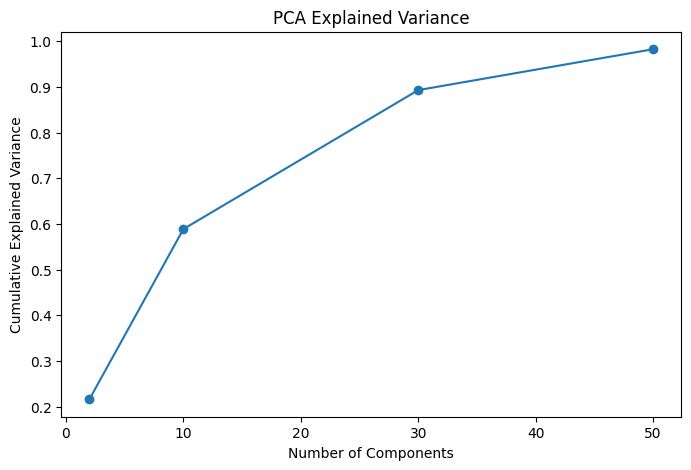

In [5]:
plt.figure(figsize=(8,5))
plt.plot(components_list, explained_variances, marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('PCA Explained Variance')
plt.show()

In [6]:
pca_2 = PCA(n_components=2)
X_pca_2 = pca_2.fit_transform(X_scaled)

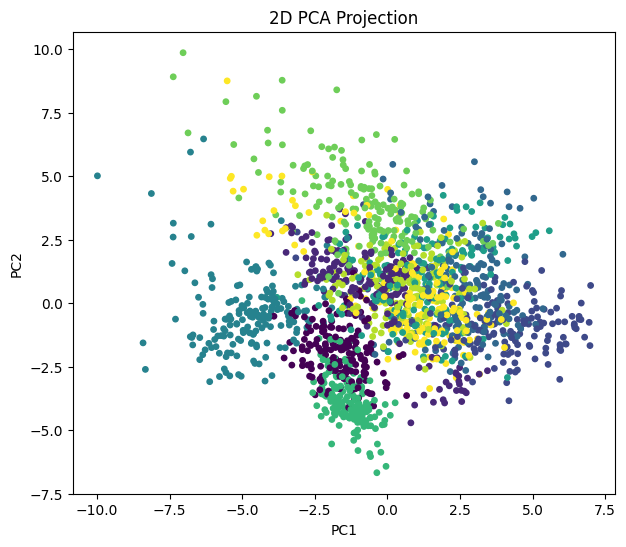

In [7]:
plt.figure(figsize=(7,6))
plt.scatter(X_pca_2[:,0], X_pca_2[:,1], c=y, s=15)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('2D PCA Projection')
plt.show()

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
model_original = LogisticRegression(max_iter=2000)
model_original.fit(X_train, y_train)
y_pred_original = model_original.predict(X_test)
acc_original = accuracy_score(y_test, y_pred_original)
acc_original

0.9722222222222222

In [9]:
pca_30 = PCA(n_components=30)
X_reduced = pca_30.fit_transform(X_scaled)
X_train_r, X_test_r, y_train_r, y_test_r = train_test_split(X_reduced, y, test_size=0.2, random_state=42)
model_reduced = LogisticRegression(max_iter=2000)
model_reduced.fit(X_train_r, y_train_r)
y_pred_reduced = model_reduced.predict(X_test_r)
acc_reduced = accuracy_score(y_test_r, y_pred_reduced)
acc_reduced

0.9611111111111111

In [10]:
acc_original, acc_reduced

(0.9722222222222222, 0.9611111111111111)